In [5]:
import glob
import json
from tqdm import tqdm 
import numpy as np

In [2]:
score_dirs = "../similarity_scores/"

In [3]:
dsname2data = dict()

for fpath in tqdm(list(glob.glob(score_dirs + "*.json"))):
    dataset_name = fpath.split("/")[-1].split("_")[3][2:-2]
    data = json.load(open(fpath, "r"))
    dsname2data[dataset_name] = data

100%|██████████| 9/9 [00:00<00:00, 187.29it/s]


In [8]:
dsname2KL_divs = dict()

for dataset_name, data in tqdm(dsname2data.items()):
    all_divs = []
    history = data["history"]
    for round_i in range(len(history) - 1):
        sim_mat_i = np.array(history[round_i]["matrix"])
        sim_mat_i1 = np.array(history[round_i + 1]["matrix"])

        tril_indices = np.tril_indices(sim_mat_i.shape[0])
        sim_vec_i = sim_mat_i[tril_indices]
        sim_vec_i1 = sim_mat_i1[tril_indices]

        # calculate the KL divergence between sim_vec_i and sim_vec_i1
        # add a small value to avoid division by zero
        epsilon = 1e-10
        sim_vec_i = sim_vec_i + epsilon
        sim_vec_i1 = sim_vec_i1 + epsilon
        sim_vec_i = sim_vec_i / np.sum(sim_vec_i)
        sim_vec_i1 = sim_vec_i1 / np.sum(sim_vec_i1)
        KL_div = np.sum(sim_vec_i * np.log(sim_vec_i / sim_vec_i1))
        all_divs.append(KL_div)

    dsname2KL_divs[dataset_name] = all_divs


100%|██████████| 9/9 [00:00<00:00, 133.64it/s]


In [22]:
len(dsname2KL_divs.keys())

9

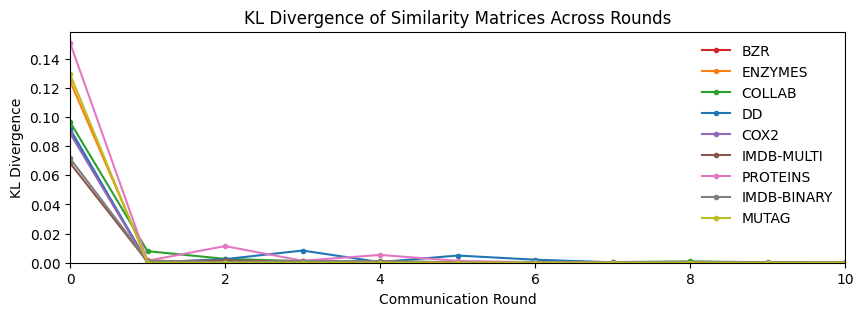

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 3))

# nine colors 
colors = ['#d62728',  '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
for i, (dataset_name, KL_divs) in enumerate(dsname2KL_divs.items()):
    ax.plot(KL_divs, label=dataset_name, marker='o', markersize=3, color=colors[i])

plt.xlim(0,10)
plt.ylim(0)
plt.legend(frameon=False)

plt.xlabel("Communication Round")
plt.ylabel("KL Divergence")

plt.title("KL Divergence of Similarity Matrices Across Rounds")

plt.savefig("similarity_KL_divergence_across_datasets.pdf", dpi=300, bbox_inches='tight')
plt.show()